# Performance Analysis of Awkward-array vs Numba optimized Awkward-array

## Content:
-  [Awkward package performance on large arrays](#Awkward-package-performance-on-large-arrays)
    -  [Profilling of Awkward package](#[Profilling-of-Awkward-package])
        -  [Using %%timeit](#Awkward-Array-Using-%%timeit)
        -  [Using cProfile](#Awkward-Array-Using-cProfile)
  <br>
  <br>
- [Awkward Numba package](#Awkward-Numba-package-performance-on-large-arrays)
    -  [Profilling of Awkward Numba package](#Profilling-of-Awkward-Numba-package)
        -  [Using %%timeit](#Awkward-Array-Numba-Using-%%timeit)
        -  [Using cProfile](#Awkward-Array-Numba-Using-cProfile)
  
  
- [Speed Difference at a glance](#Speed-Difference-at-a-galnce)


## Awkward Array  
##### Awkward-array is a pure Python+Numpy library for manipulating complex data structures as you would Numpy arrays. Even if your data structures
 

In [57]:
import awkward
from awkward import JaggedArray

In [58]:
array = awkward.fromiter([[1.1, 2.2, None, 3.3, None],
                          [4.4, [5.5]],
                          [{"x": 6, "y": {"z": 7}}, None, {"x": 8, "y": {"z": 9}}]
                         ])
print("array = ",array, "\ntype: ",type(array))

array =  [[1.1 2.2 None 3.3 None] [4.4 [5.5]] [<Row 0> None <Row 1>]] 
type:  <class 'awkward.array.jagged.JaggedArray'>


In [59]:
array.tolist()

[[1.1, 2.2, None, 3.3, None],
 [4.4, [5.5]],
 [{'x': 6, 'y': {'z': 7}}, None, {'x': 8, 'y': {'z': 9}}]]

In [60]:
array[:, :2]

<JaggedArray [[1.1 2.2] [4.4 [5.5]] [<Row 0> None]] at 0x022c1a7e7ac8>

### Awkward Array package performance on large arrays
-  [Using %%timeit](#Awkward-Array-Using-%%timeit)
-  [Using cProfile](#Awkward-Array-Using-cProfile)

#### Awkward-Array-Using-%%timeit

In [82]:
%%timeit
benchmark_no_numba()

329 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
time_no_numba = %timeit -po benchmark_no_numba()

3.57 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
time_no_numba = []
for _ in range(10):
    time = %timeit -o benchmark_no_numba(data)
    time_no_numba.append(time.best)

time_no_numba

578 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
490 ms ± 8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
491 ms ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
575 ms ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
549 ms ± 28.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
499 ms ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
578 ms ± 61.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
483 ms ± 8.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
480 ms ± 4.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
532 ms ± 69.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[0.546779000000015,
 0.4808441999999786,
 0.47954939999999624,
 0.5532634999999573,
 0.48279630000001816,
 0.4730121000000054,
 0.4952147999999852,
 0.471652499999891,
 0.4732694999999012,
 0.4772097999999687]

## Awkward Array Numba - A Numba-jitted Awkward Array
##### Awkward-array Numba uses jitted loops to help optimise the Awkward-array package. All function calls etc. remain the same as that of the base package.

In [61]:
import awkward_numba
from awkward_numba import JaggedArray

In [62]:
array = JaggedArray.fromiter([[1.1, 2.2, None, 3.3, None],
                          [4.4, [5.5]],
                          [{"x": 6, "y": {"z": 7}}, None, {"x": 8, "y": {"z": 9}}]
                         ])
print("array = ",array, "\ntype: ",type(array))

array =  [[1.1 2.2 None 3.3 None] [4.4 [5.5]] [{'x': 6, 'y': {'z': 7}} None {'x': 8, 'y': {'z': 9}}]] 
type:  <class 'awkward.array.jagged.JaggedArray'>


In [63]:
array.tolist()

[[1.1, 2.2, None, 3.3, None],
 [4.4, [5.5]],
 [{'x': 6, 'y': {'z': 7}}, None, {'x': 8, 'y': {'z': 9}}]]

### Profilling of Awkward Numba package
-  [Using %%timeit](#Awkward-Array-Numba-Using-%%timeit)
-  [Using cProfile](#Awkward-Array-Numba-Using-cProfile)

##### Awkward Array Numba Using %%timeit

In [77]:
%%timeit
benchmark_numba()

307 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
time_numba = %timeit -o benchmark_numba()

354 ms ± 53.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
time_numba = []
for _ in range(10):
    time = %timeit -o benchmark_numba(data)
    time_numba.append(time.best)

time_numba

732 ms ± 94.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
707 ms ± 32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
713 ms ± 70.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
788 ms ± 56.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
627 ms ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
595 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
620 ms ± 37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
644 ms ± 51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
611 ms ± 31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
831 ms ± 94.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[0.6046815000000834,
 0.641331799999989,
 0.6062712000000374,
 0.7204532999999174,
 0.5949045999999498,
 0.5670670000000655,
 0.5881273999999621,
 0.5915147999999135,
 0.5712482999999793,
 0.6571864999999661]

### Speed Difference at a glance

In [71]:
# time_numba = [1,2,3,4,5,6,7]
# time_no_numba = [2*i for i in time_numba]

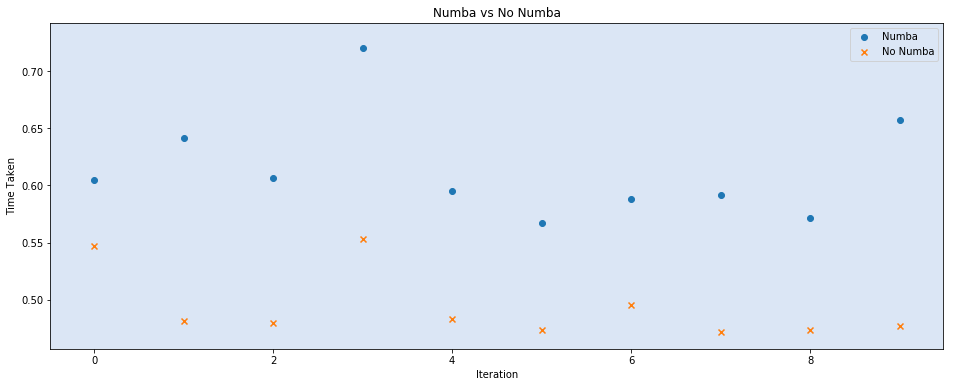

In [41]:
import matplotlib.pyplot as plt
time_numba_plot = plt.scatter([i for i in range(len(time_numba))],time_numba, marker = "o")
time_no_numba_plot = plt.scatter([i for i in range(len(time_numba))],time_no_numba, marker = "x")
plt.rcParams['axes.facecolor'] = "#dbe6f5"
plt.title("Numba vs No Numba")
plt.xlabel('Iteration')
plt.ylabel('Time Taken')
plt.legend((time_numba_plot , time_no_numba_plot),("Numba","No Numba"))
plt.rcParams["figure.figsize"] = [16,6]
plt.show()

C:\Users\ratin\AppData\Local\Continuum\anaconda3\envs\awkward\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001CF490EB080>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\ratin\AppData\Local\Continuum\anaconda3\envs\awkward\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001CF4906B240>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


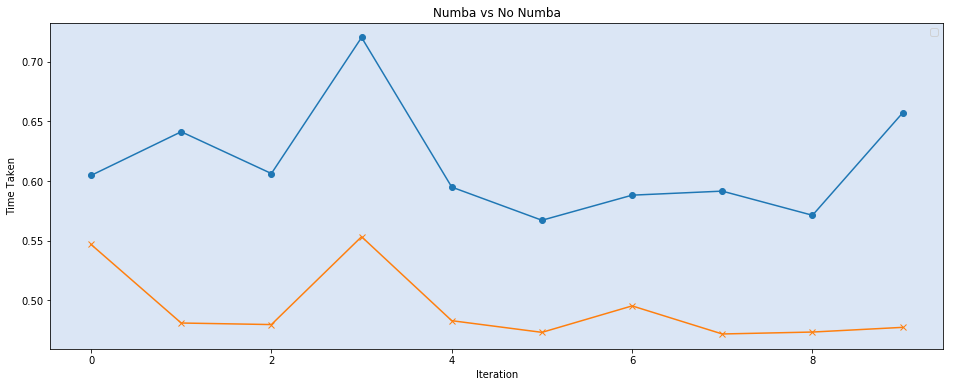

In [44]:
time_numba_plot = plt.plot([i for i in range(len(time_numba))],time_numba, marker = "o")
time_no_numba_plot = plt.plot([i for i in range(len(time_numba))],time_no_numba, marker = "x")
plt.rcParams['axes.facecolor'] = "#dbe6f5"
plt.title("Numba vs No Numba")
plt.xlabel('Iteration')
plt.ylabel('Time Taken')
plt.legend((time_numba_plot , time_no_numba_plot),("Numba","No Numba"))
plt.rcParams["figure.figsize"] = [16,6]
plt.show()

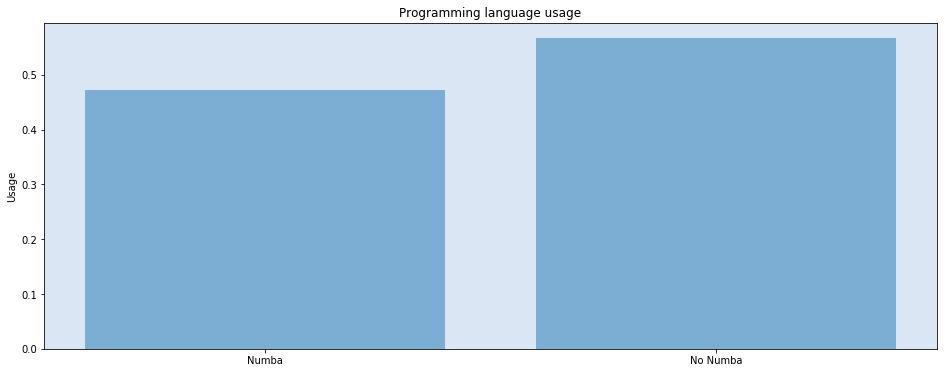

In [58]:
objects = ('Numba','No Numba')
y_pos = np.arange(len(objects))
performance = [min(time_no_numba),min(time_numba)]
 
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

In [2]:
import numpy as np
import numba
from awkward_numba import JaggedArray
import random
import h5py
import awkward

In [88]:
#Error occurs when we use awkward_numba.JaggedArray
for i in range(3):
    print("jagged_array_{}".format(i))
    jagged_array = awkward.JaggedArray.fromiter([[random.randint(1,1000) for _ in range(random.randint(-1,10))]for _ in range(random.randint(-1,8))])
    akdh5['jagged_array____{}'.format(i)] = jagged_array


jagged_array_0
jagged_array_1
jagged_array_2


In [48]:
for key in akdh5.keys():
    print(akdh5[(key)])

[[611 188] [337 799 292 ... 296 759 856] [146] ... [490 31 90 ... 647 949 778] [956 485] [503]]
[]
[[269 179 473 ... 22 409 854] [905] [] [690 614 179 ... 149 339 149] [291 780 966 ... 906 545 28]]


In [23]:
for key in akdh5.keys():
    print(key)

jagged_array_0
jagged_array_1
jagged_array_2


In [25]:
import random
import awkward_numba
from awkward_numba import JaggedArray
def dataset_generator():
    h5file = h5py.File("dataset{}.hdf5".format(random.randint(1000,10000000)),"w")
    awkwd = awkward.hdf5(h5file)
    for i in range(10):
        jagged_array = awkward_numba.JaggedArray.fromiter([[random.randint(1,1000) for _ in range(random.randint(-1,1000))]for _ in range(random.randint(-1,10000))])
        awkwd['jagged_array_{}'.format(i)] = jagged_array
        if(i%1==0):
            print(i)
#         print('jagged_array_{}'.format(i),jagged_array)
    return h5file


def dataset_reader(h5file,numba=True):
    awkwd = awkward_numba.hdf5(h5file)
    for key in h5file.keys():
        if numba:
            min = awkward.JaggedArray._argminmax_general_numba(awkwd[(key)], True)
        else:
            min = awkward.JaggedArray._argminmax_general(awkwd[(key)], True)
#         print("\nArray is: ",awkwd[key],"\n argminmax: ",min)
        

In [3]:
# import random
# import awkward_numba
# from awkward_numba import JaggedArray
# def dataset_generator():
#     dataset = []
#     for i in range(0,100):
#         jagged_array = awkward_numba.JaggedArray.fromiter([[random.randint(1,1000) for _ in range(random.randint(-1,10))]for _ in range(random.randint(-1,600))])
#         dataset.append(jagged_array)
#     return dataset


# def dataset_reader(dataset,Numba=True):
#     for data in dataset:
#         if Numba:
#             min = awkward_numba.JaggedArray._argminmax_general(data, True)
#         else:
#             min = awkward_numba.JaggedArray._argminmax_general_native(data, True)
# #         print(key,": ",awkwd[(key)]," type: ",type(awkwd[(key)]))
# #         print("/n argminmax",awkwd[(key)]._argminmax_general(True))
        

In [4]:
def benchmark_no_numba(data):
#     data = dataset_generator()
    dataset_reader(data,numba=False)

In [5]:
def benchmark_numba(data):
#     data = dataset_generator()
    dataset_reader(data,numba=True)

In [26]:
data = dataset_generator()

0
1
2
3
4
5
6
7
8
9


In [8]:
len(data)

10

In [27]:
%%timeit
dataset_reader(data,False)

496 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%timeit
dataset_reader(data)

643 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
arr = JaggedArray.fromiter([[1.1, 2.2, 3.3], [], [5.5, 4.4]])

In [14]:
def data_creator(size):
    if size=="Large":
        for i in range(100):
            jagged_array = JaggedArray.fromiter([[random.randint(1,1000) for _ in range(random.randint(-1,10000))]for _ in range(random.randint(-1,16000))])
            with open('dataset-awkd/jagged_array{}.txt'.format(i), 'w+') as hf:
                hf.write(str(jagged_array))
    return "dataset created successfully"

In [11]:
for i in range(3):
        jagged_array = JaggedArray.fromiter([[random.randint(1,1000) for _ in range(random.randint(-1,10))]for _ in range(random.randint(-1,8))])
        with open('dataset-awkd/jagged_array{}.txt'.format(i), 'w+') as hf:
            hf.write(str(jagged_array))